In [75]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [8]:
df = pd.read_csv('./data/cali_2011_2018.csv', index_col = None)
df

,Date,RegionName,RegionID,SizeRank,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,oc

In [9]:
df.isna().sum().sort_values(ascending=False).head(20)

pop_separated                        4640
pop_now_married                      4640
pop_15_and_over                      4640
pop_widowed                          4640
pop_never_married                    4640
pop_divorced                         4640
speak_only_english_at_home           3482
speak_spanish_at_home                3482
speak_spanish_at_home_low_english    3482
pop_5_years_over                     3482
one_year_more_college                1166
commute_40_44_mins                   1166
commute_35_39_mins                   1166
high_school_diploma                  1166
commute_60_89_mins                   1166
less_one_year_college                1166
commute_90_more_mins                 1166
pop_25_years_over                    1166
amerindian_including_hispanic        1166
households_retirement_income         1166
dtype: int64

In [11]:
df.isna().sum().sort_values(ascending=False).head(20).keys()

Index(['pop_separated', 'pop_now_married', 'pop_15_and_over', 'pop_widowed',
       'pop_never_married', 'pop_divorced', 'speak_only_english_at_home',
       'speak_spanish_at_home', 'speak_spanish_at_home_low_english',
       'pop_5_years_over', 'one_year_more_college', 'commute_40_44_mins',
       'commute_35_39_mins', 'high_school_diploma', 'commute_60_89_mins',
       'less_one_year_college', 'commute_90_more_mins', 'pop_25_years_over',
       'amerindian_including_hispanic', 'households_retirement_income'],
      dtype='object')

In [27]:
df2 = df.dropna()
#df2 = df2[df2.avg_rent < 8000]

In [28]:
df2.shape

(3194, 255)

<AxesSubplot:>

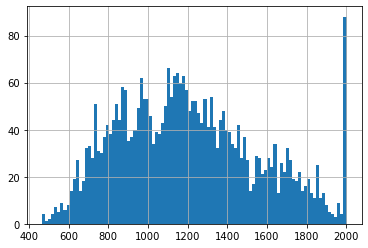

In [34]:
df2["median_rent"].hist(bins = 100)

<AxesSubplot:>

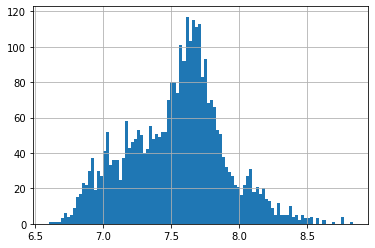

In [38]:
np.log(df2["avg_rent"]).hist(bins = 100)

In [ ]:
import plotly.express as px
fig = px.scatter(x =np.log(df2["income_per_capita"]), y = np.log(df2["avg_rent"]))
fig.show()

In [113]:
fig = px.scatter(x =np.log(df2["gini_index"]), y = np.log(df2["avg_rent"]))
fig.show()

In [121]:
X = df2.drop(["RegionName", "RegionID","avg_rent","median_rent", "Date"], axis = 1)
#X= df2[['median_rent']]
#use log transformed y
y = df2.avg_rent

In [124]:
mlr = LinearRegression()
#mlr_train = []
mlr_log = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    #mlr_train.append(mlr.score(X_train, y_train))
    mlr_log.append(mlr.score(X_test, y_test))

In [16]:
# scores = pd.concat([pd.DataFrame({'score':mlr_log,'model':'log'})
#                     ,pd.DataFrame({'score':mlr_lin,'model':'lin'})
#                    ])
# sns.set(rc = {'figure.figsize':(15,8)})
# sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

NameError: name 'mlr_log' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Setting max_iter because it doesn't coverge without it
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(.05, .55, 100)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [66]:
coefs_lasso

,SizeRank,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,one_parent_famili

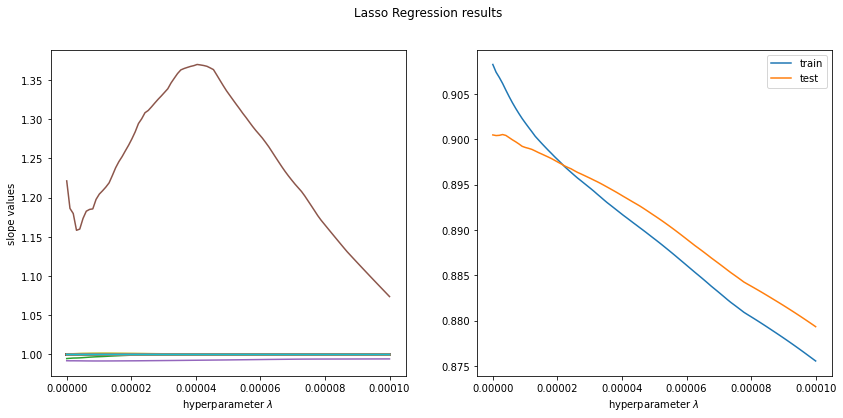

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True, max_iter = 1000000)
lasso_pipe = Pipeline([
    #('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.000001, 0.0001, 100)}

kfold = KFold(n_splits = 3, shuffle = True)
gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = kfold)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 37537378.59140596, tolerance: 89975.37222348206

/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 23608528.551917043, tolerance: 89193.94760577822

/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 37567956.04537077, tolerance: 95847.94711377563

/Users/chereowang27/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want

In [114]:
sorted(lasso_coefs.items(), key = lambda item: item[0], reverse = True)

[('workers_16_and_over', 0.0),
 ('worked_at_home', 1.3411832525986157e-05),
 ('white_pop', -2.6636304242531053e-06),
 ('white_male_55_64', 0.0),
 ('white_male_45_54', -3.188274619244092e-05),
 ('white_including_hispanic', 2.630862323706517e-06),
 ('walked_to_work', 3.713198534312308e-05),
 ('vacant_housing_units_for_sale', -0.00010607329796088257),
 ('vacant_housing_units_for_rent', -6.820632387243858e-05),
 ('vacant_housing_units', 1.7177923264773446e-05),
 ('unemployed_pop', -0.0),
 ('two_parents_not_in_labor_force_families_with_young_children',
  -0.00016756847779452968),
 ('two_parents_mother_in_labor_force_families_with_young_children',
  3.587796100702747e-05),
 ('two_parents_in_labor_force_families_with_young_children', -0.0),
 ('two_parents_father_in_labor_force_families_with_young_children',
  -1.4916167809416044e-05),
 ('two_parent_families_with_young_children', -0.0),
 ('two_or_more_races_pop', 1.030468463790035e-05),
 ('two_cars', -0.0),
 ('total_pop', 0.0),
 ('three_cars',

In [112]:
lasso.set_params(alpha = .000008, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
len(lasso_coefs_keep)
lasso_coefs_keep

{'gini_index': 0.08657512278003779,
 'percent_income_spent_on_rent': 0.0006458238337349524,
 'renter_occupied_housing_units_paying_cash_median_gross_rent': 0.00021600701893996805,
 'male_80_to_84': 7.6761967153825e-05,
 'female_67_to_69': 7.666307594006087e-05,
 'female_65_to_66': 6.346700239255703e-05,
 'female_75_to_79': 5.420864702619963e-05,
 'black_male_55_64': 5.1613183285967006e-05,
 'male_45_64_high_school': 5.011606168255427e-05,
 'housing_built_2005_or_later': 4.677002296699957e-05,
 'no_cars': 4.1794796706834274e-05,
 'rent_under_10_percent': 4.062336069618595e-05,
 'male_45_64_associates_degree': 3.743100535137226e-05,
 'walked_to_work': 3.713198534312308e-05,
 'two_parents_mother_in_labor_force_families_with_young_children': 3.587796100702747e-05,
 'income_35000_39999': 3.412739495067333e-05,
 'male_75_to_79': 3.248132475915849e-05,
 'commute_60_89_mins': 2.9428784821375e-05,
 'male_male_households': 2.9389836791870943e-05,
 'dwellings_1_units_attached': 2.7392080294282817

In [115]:
lasso.set_params(alpha = .000008, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))


lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[0], reverse = True)
                    if v !=0}
len(lasso_coefs_keep)
lasso_coefs_keep

{'worked_at_home': 1.3411832525986157e-05,
 'white_pop': -2.6636304242531053e-06,
 'white_male_45_54': -3.188274619244092e-05,
 'white_including_hispanic': 2.630862323706517e-06,
 'walked_to_work': 3.713198534312308e-05,
 'vacant_housing_units_for_sale': -0.00010607329796088257,
 'vacant_housing_units_for_rent': -6.820632387243858e-05,
 'vacant_housing_units': 1.7177923264773446e-05,
 'two_parents_not_in_labor_force_families_with_young_children': -0.00016756847779452968,
 'two_parents_mother_in_labor_force_families_with_young_children': 3.587796100702747e-05,
 'two_parents_father_in_labor_force_families_with_young_children': -1.4916167809416044e-05,
 'two_or_more_races_pop': 1.030468463790035e-05,
 'speak_spanish_at_home_low_english': 1.1690833849346757e-06,
 'speak_spanish_at_home': 9.830639904131981e-07,
 'speak_only_english_at_home': -1.1952426606393698e-09,
 'sales_office_employed': -1.0957391780964965e-07,
 'renter_occupied_housing_units_paying_cash_median_gross_rent': 0.000216007

In [119]:
list(lasso_coefs_keep.keys())

['worked_at_home',
 'white_pop',
 'white_male_45_54',
 'white_including_hispanic',
 'walked_to_work',
 'vacant_housing_units_for_sale',
 'vacant_housing_units_for_rent',
 'vacant_housing_units',
 'two_parents_not_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_or_more_races_pop',
 'speak_spanish_at_home_low_english',
 'speak_spanish_at_home',
 'speak_only_english_at_home',
 'sales_office_employed',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'rent_under_10_percent',
 'rent_burden_not_computed',
 'rent_40_to_50_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'pop_widowed',
 'pop_separated',
 'pop_now_married',
 'pop_divorced',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units_upper_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_lo

In [120]:
with open('lasso_coefs_keep', 'w') as f: 
    for items in lasso_coefs_keep:
        f.write("%s\n" % item)
        

NameError: name 'item' is not defined

In [171]:
#coefs_lasso.loc[0.2,coefs_lasso.loc[0.2,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.051690
million_dollar_housing_units                         0.028710
dwellings_50_or_more_units                           0.005085
owner_occupied_housing_units_lower_value_quartile    0.001376
owner_occupied_housing_units_median_value            0.001071
income_per_capita                                    0.000342
owner_occupied_housing_units_upper_value_quartile    0.000081
white_pop                                           -0.000609
Name: 0.2, dtype: float64

In [173]:
#coefs_lasso.loc[0.3,coefs_lasso.loc[0.3,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.031656
million_dollar_housing_units                         0.014222
owner_occupied_housing_units_median_value            0.001241
owner_occupied_housing_units_lower_value_quartile    0.001229
dwellings_50_or_more_units                           0.000538
owner_occupied_housing_units_upper_value_quartile    0.000030
Name: 0.3, dtype: float64

In [172]:
#coefs_lasso.loc[0.4,coefs_lasso.loc[0.4,:] != 0].sort_values(ascending=False)

hispanic_male_45_54                                  0.011663
owner_occupied_housing_units_median_value            0.001303
owner_occupied_housing_units_lower_value_quartile    0.001158
Name: 0.4, dtype: float64

In [66]:
# Let's try running the model again with only the attributes that survived at alpha = 0.1
alpha_0pt1_attr = coefs_lasso.loc[0.1,coefs_lasso.loc[0.1,:] != 0].sort_values(ascending=False).keys()
alpha_0pt1_attr

Index(['hispanic_male_45_54', 'male_80_to_84', 'male_male_households',
       'million_dollar_housing_units', 'male_85_and_over', 'walked_to_work',
       'asian_male_55_64', 'employed_information',
       'dwellings_50_or_more_units', 'male_75_to_79',
       'dwellings_1_units_attached', 'commute_45_59_mins',
       'owner_occupied_housing_units_lower_value_quartile',
       'owner_occupied_housing_units_median_value', 'income_per_capita',
       'owner_occupied_housing_units_upper_value_quartile',
       'dwellings_20_to_49_units', 'white_pop', 'amerindian_pop',
       'dwellings_2_units', 'different_house_year_ago_same_city',
       'households_public_asst_or_food_stamps',
       'vacant_housing_units_for_rent'],
      dtype='object')

In [68]:
X_0pt1 = X[alpha_0pt1_attr]
X_0pt1

,hispanic_male_45_54,male_80_to_84,male_male_households,million_dollar_housing_units,male_85_and_over,walked_to_work,asian_male_55_64,employed_information,dwellings_50_or_more_units,male_75_to_79,dwellings_1_units_attached,commute_45_59_mins,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,income_per_capita,owner_occupied_housing_units_upper_value_quartile,dwellings_20_to_49_units,white_pop,amerindian_pop,dwellings_2_units,different_house_year_ago_same_city,households_public_asst_or_food_stamps,vacant_housing_units_for_rent
0,0,0,0,0,0,18,0,0,0,0,0,0,69100.0,138700.0,20743.0,227100.0,0,134,0,0,0.0,14,0
1,0,4,0,0,8,7,0,0,2,8,0,29,198200.0,314900.0,51602.0,425000.0,0,558,0,22,0.0,14,0
2,0,26,0,0,22,33,0,9,3,15,5,26,139800.0,193500.0,26035.0,254800.0,10,1212,3,20,0.0,86,10
3,18,30,0,14,14,26,0,0,0,87,0,0,75800.0,179700.0,20399.0,239300.0,0,2373,13,0,194.0,210,33
4,0,81,0,0,5,63,0,0,0,103,6,88,25500.0,38100.0,14566.0,68400.0,23,2845,0,44,145.0,324,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,15,56,6,43,20,29,0,42,0,75,38,133,274700.0,372100.0,38153.0,553100.0,0,2480,0,0,0.0,28,0
11932,1,25,0,44,0,8,0,0,0,29,34,7,162800.0,367900.0,55735.0,851600.0,0,656,0,77,0.0,0,32
11933,0,0,0,0,0,3,0,0,0,0,21,0,269100.0,327000.0,38667.0,385500.0,0,731,0,0,2.0,51,0
11934,0,0,0,0,0,0,0,0,0,40,0,58,190800.0,235100.0,19516.0,292100.0,0,986,0,32,0.0,0,0


In [69]:
mlr = LinearRegression()
mlr_0pt1 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_0pt1, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_0pt1.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

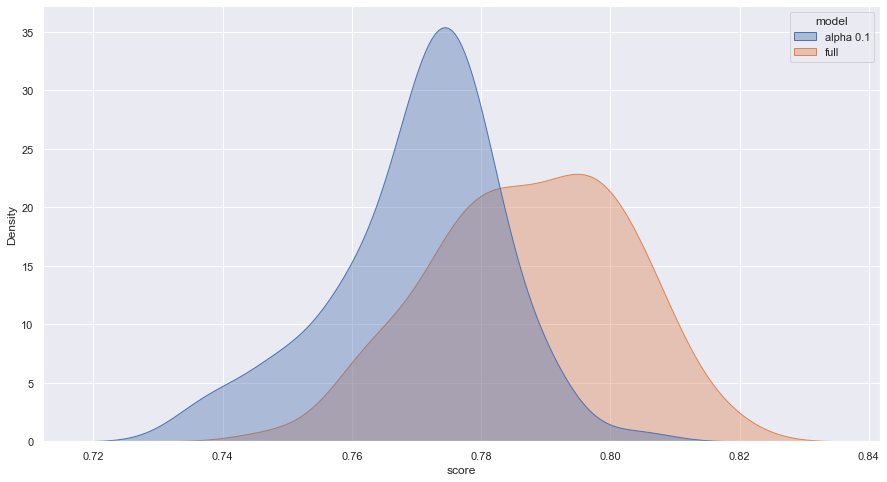

In [72]:
scores = pd.concat([pd.DataFrame({'score':mlr_0pt1,'model':'alpha 0.1'})
                    ,pd.DataFrame({'score':mlr_lin,'model':'full'})
                   ])
sns.set(rc = {'figure.figsize':(15,8)})
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [105]:
# Now let's try running the model with alpha=0.1 100 times and averaging over the coefficients
lasso = Lasso(max_iter=10000, normalize=True, alpha=0.1)
coefs_lasso = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)  
coefs_lasso = pd.DataFrame(coefs_lasso, index = range(100), columns = X_train.columns)

In [114]:
attr = list(abs(coefs_lasso.mean(axis=0)).sort_values(ascending=False).keys())

In [174]:
attr

['hispanic_male_45_54',
 'male_male_households',
 'male_80_to_84',
 'million_dollar_housing_units',
 'vacant_housing_units_for_rent',
 'male_85_and_over',
 'walked_to_work',
 'asian_male_55_64',
 'dwellings_50_or_more_units',
 'households_public_asst_or_food_stamps',
 'different_house_year_ago_same_city',
 'employed_information',
 'dwellings_1_units_attached',
 'dwellings_2_units',
 'white_pop',
 'commute_45_59_mins',
 'male_45_64_less_than_9_grade',
 'owner_occupied_housing_units_lower_value_quartile',
 'amerindian_pop',
 'income_30000_34999',
 'owner_occupied_housing_units_median_value',
 'dwellings_20_to_49_units',
 'commute_40_44_mins',
 'male_75_to_79',
 'mobile_homes',
 'income_per_capita',
 'dwellings_1_units_detached',
 'commuters_by_subway_or_elevated',
 'housing_built_2005_or_later',
 'speak_spanish_at_home_low_english',
 'owner_occupied_housing_units_upper_value_quartile',
 'male_45_64_graduate_degree',
 'speak_spanish_at_home',
 'income_25000_29999',
 'median_income',
 'inc

In [109]:
#coefs_lasso.mean(axis=0).sort_values(ascending=False)

In [127]:
scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for a in attr: 
    if X_train.shape[1] > 1:
        X_train = X_train.drop(columns=a)
        X_test = X_test.drop(columns=a)
        mlr.fit(X_train, y_train)
        scores.append(mlr.score(X_test, y_test))

In [128]:
X_train.shape[1]

1

In [110]:
#scores

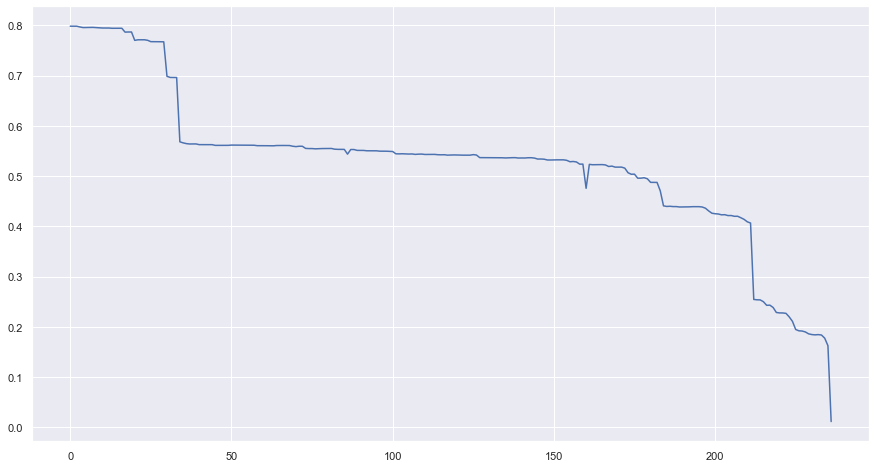

In [130]:
plt.plot(scores)
plt.show()

In [157]:
for i in range(10): 
    scores[i] = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    X_train2 = pd.DataFrame()
    X_test2 = pd.DataFrame()
    for a in attr: 
        X_train2[a] = X_train[a]
        X_test2[a] = X_test[a]
        mlr.fit(X_train2, y_train)
        scores[i].append(mlr.score(X_test2, y_test))

In [158]:
scores_avg = []
for i in range(len(scores[1])):
    scores_avg.append()

238

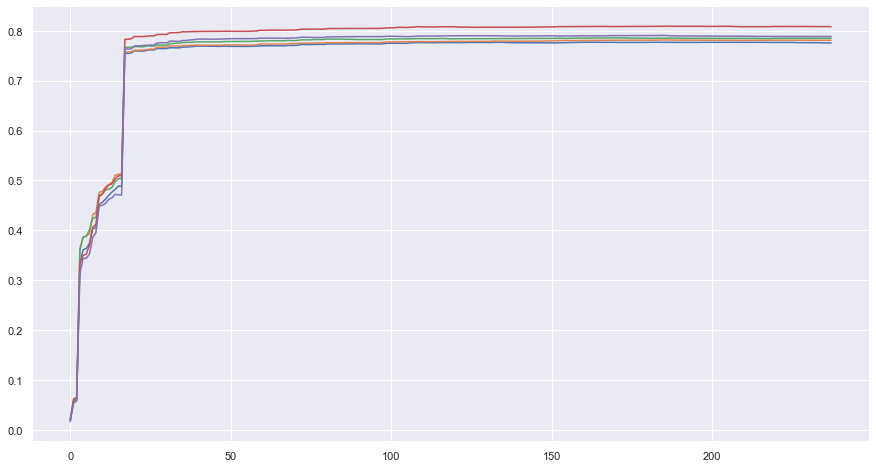

In [156]:
plt.plot(scores)
plt.plot(scores2)
plt.plot(scores3)
plt.plot(scores4)
plt.plot(scores5)
plt.show()

# Random Forest 🌳

In [32]:
model = ensemble.RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
%time model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

CPU times: user 1min 48s, sys: 286 ms, total: 1min 48s
Wall time: 1min 48s
The training r2: 0.97100
The test     r2: 0.80333


In [21]:
model = ensemble.RandomForestRegressor()
fst_base_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    fst_base_scores.append(model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
fst_data = pd.concat([#pd.DataFrame({'score':fst_scores,'model':'Tuned Parameters'}),
                  pd.DataFrame({'score':fst_base_scores,'model':'Default Parameters'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.6)
sns.kdeplot(data=fst_data, x="score", hue="model", fill=True, common_norm=False, alpha=0.4, linewidth=3)

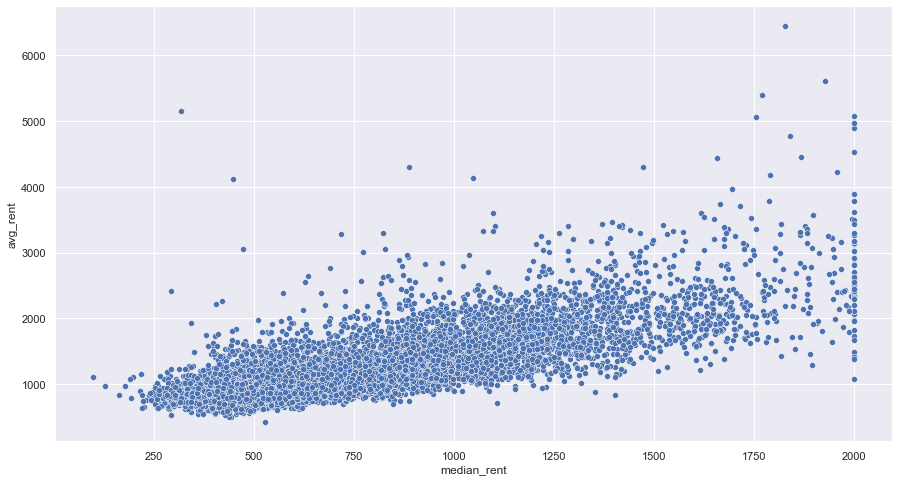

In [176]:
# So something weird is happening. Maybe we should look at the median_rent vs. avg_rent
sns.scatterplot(data=df[df.avg_rent<8000], x="median_rent", y="avg_rent")
#sns.scatterplot(data=df, x="median_rent", y="avg_rent")
#plt.ylim(0, 5000)
#plt.xlim(0, 2000)
plt.show()

In [161]:
# There are some really weird outliers here. Maybe we should look into these. 
df[df.avg_rent > 8000]

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e